In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import shutil
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from google.colab import files
from tensorflow.keras.optimizers import AdamW


print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [ ]:
# zip_name = next(iter(uploaded))
# with zipfile.ZipFile(zip_name, 'r') as zip_ref:
#     zip_ref.extractall()

# # Cek isi direktori
# os.listdir()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

# Menampilkan perangkat yang tersedia
physical_devices = tf.config.list_physical_devices()
for device in physical_devices:
    print(device)

PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [ ]:
import tensorflow as tf

# Menampilkan GPU yang terdeteksi TensorFlow
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("TensorFlow menggunakan GPU.")
    for gpu in gpus:
        print(gpu)
else:
    print("TensorFlow menggunakan CPU.")

TensorFlow menggunakan GPU.
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'

import tensorflow as tf
from tensorflow.python.client import device_lib

print("Daftar perangkat:")
print(device_lib.list_local_devices())

# Operasi contoh
a = tf.constant([[1.0, 2.0]])
b = tf.constant([[3.0], [4.0]])
c = tf.matmul(a, b)
print(c)

Daftar perangkat:
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11832218275022555185
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14619377664
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15072723494825374866
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]
tf.Tensor([[11.]], shape=(1, 1), dtype=float32)


In [ ]:
train_dir = '/content/drive/MyDrive/FILE COLAB/dataset/train'
test_dir = '/content/drive/MyDrive/FILE COLAB/dataset/test'

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=10, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=32, class_mode='binary')
test_gen = test_datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size=32, class_mode='binary')

Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

optimizer = AdamW(learning_rate=0.005)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_gen, epochs=20, validation_data=test_gen, )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 204s 13s/step - accuracy: 0.5620 - loss: 5.3665 - val_accuracy: 0.5702 - val_loss: 0.6501
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6399 - loss: 0.6359 - val_accuracy: 0.7355 - val_loss: 0.5223
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7917 - loss: 0.4474 - val_accuracy: 0.8099 - val_loss: 0.4718
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8099 - loss: 0.5123 - val_accuracy: 0.8264 - val_loss: 0.5083
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8150 - loss: 0.4102 - val_accuracy: 0.8595 - val_loss: 0.5100
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8304 - loss: 0.4133 - val_accuracy: 0.8430 - val_loss: 0.4573
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8163 - loss: 0.3623 - val_accuracy: 0.9091 - val_loss: 0.4078
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8631 - loss: 0.3439 - val_accuracy: 0.8926 - val_los

In [ ]:
model.save('model_katarak.h5')
files.download('model_katarak.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


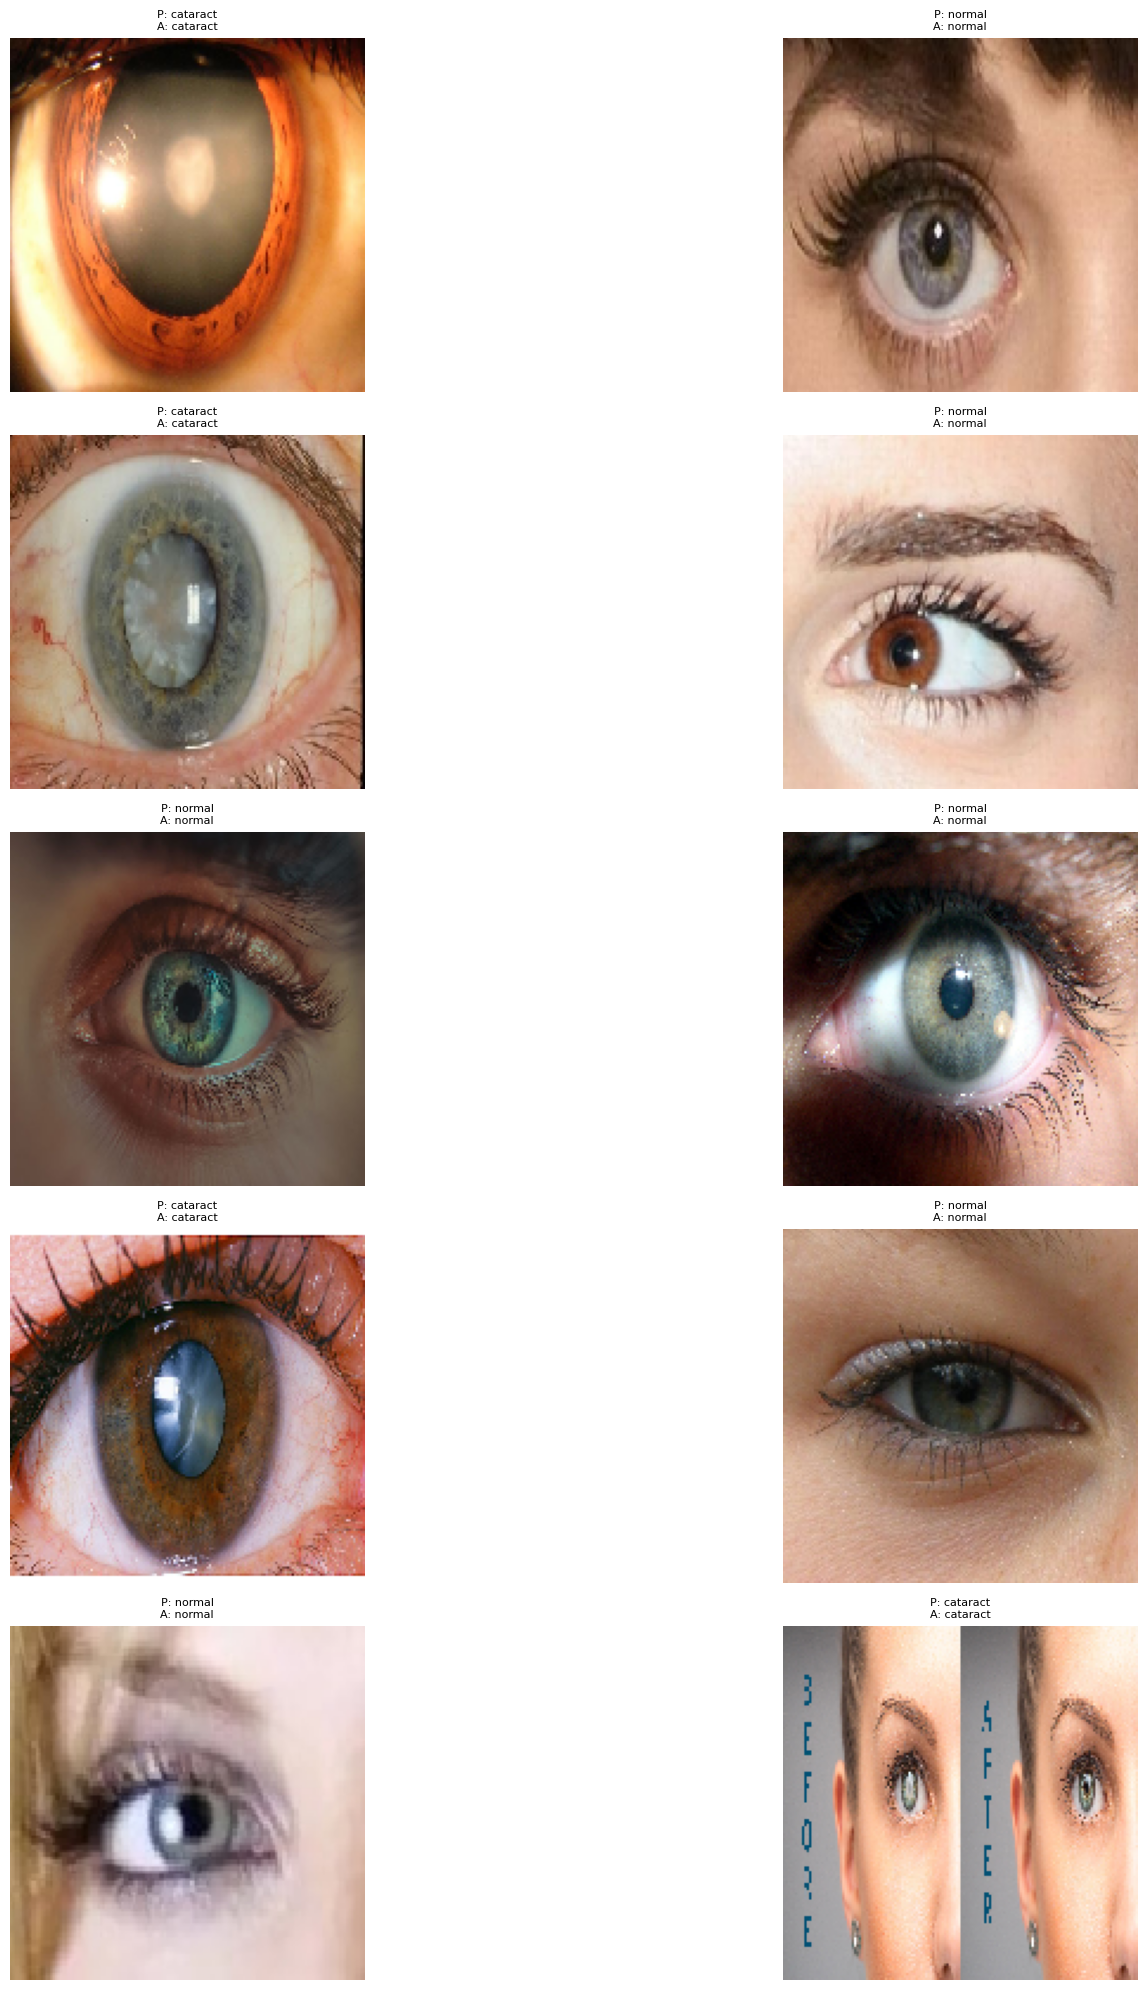

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def show_multiple_predictions(model, generator, class_names, num_images=40):
    # Ambil batch yang cukup besar
    images, labels = next(generator)

    # Pastikan jumlah gambar tidak lebih dari batch
    num_images = min(num_images, len(images))

    plt.figure(figsize=(20, 20))  # Atur ukuran grid

    for i in range(num_images):
        img = images[i]
        true_label = int(labels[i])
        prediction = model.predict(np.expand_dims(img, axis=0))[0][0]
        predicted_class = 1 if prediction >= 0.5 else 0

        plt.subplot(5, 2, i + 1)  # 5 baris × 8 kolom = 40 gambar
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"P: {class_names[predicted_class]}\nA: {class_names[true_label]}", fontsize=8)

    plt.tight_layout()
    plt.show()

# Class names (disesuaikan dengan folder datasetmu)
class_names = list(train_gen.class_indices.keys())

# Panggil fungsi dengan test_gen atau train_gen
show_multiple_predictions(model, test_gen, class_names, num_images=10)

Saving image_246.png to image_246.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


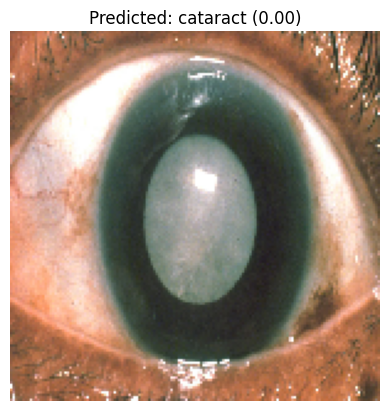

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Upload gambar dari device
uploaded = files.upload()

# Loop untuk prediksi semua gambar yang di-upload
for filename in uploaded.keys():
    # Load dan preprocess gambar
    img = image.load_img(filename, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediksi
    prediction = model.predict(img_array)[0][0]
    predicted_class = 1 if prediction >= 0.5 else 0

    # Tampilkan hasil prediksi
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {class_names[predicted_class]} ({prediction:.2f})")
    plt.show()

In [ ]:
!python --version

Python 3.11.13
